In [1]:
from post_processing_and_viz import *

# test running DAS over one state, viz count of zeros

In [2]:
def read_multiple_races(parent_dir = '/home/j/temp/beatrixh/sim_science/outputs/WA_synthetic_pop_distribution/'):
    df = pd.DataFrame()

    races = os.listdir(parent_dir)
    for race in races:
        race_df = read_dir(race)
        race_df['race'] = race
        df = df.append(race_df)
    return df

In [3]:
df = read_multiple_races()
df = add_geoid(df)

In [6]:
processed_df  = das(df, counts_var = 'pop_count', noise_parameter = 3)

In [7]:
processed_df.head()

,STATE,COUNTY,TRACT,BLKGRP,sex_id,age,pop_count,race,BLOCK,geoid,noisy_counts,nonneg_counts
0,53,005,000005,5,1,0,0,racwht,0005,530050000050005,-4.59621,0.0
1,53,007,000007,7,1,0,0,racwht,0007,530070000070007,4.38442,0.0
2,53,009,000009,9,1,0,0,racwht,0009,530090000090009,-0.307409,0.0
3,53,011,000011,11,1,0,0,racwht,0011,530110000110011,7.74597,2.0
4,53,013,000013,13,1,0,0,racwht,0013,530130000130013,-2.92648,0.0


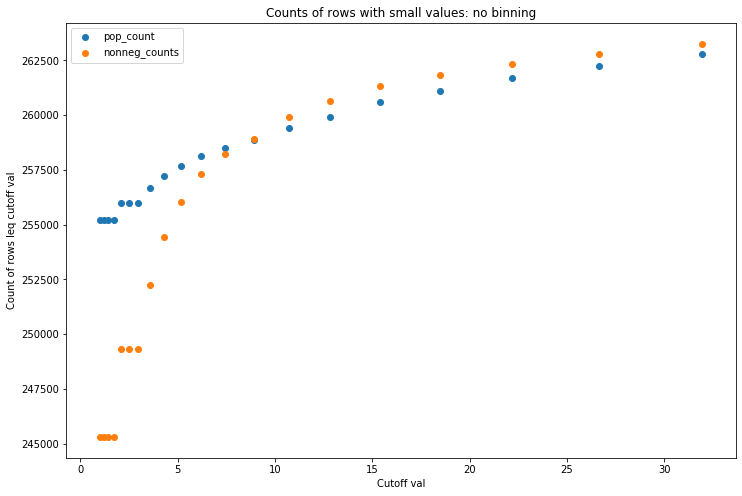

In [9]:
fig = plt.figure(figsize=(12,8))

cutoffs = 1.2**np.arange(20)
plot_small_vals(processed_df, var = 'pop_count', label = 'pop_count', cutoffs = cutoffs)
plot_small_vals(processed_df, var = 'nonneg_counts', label = 'nonneg_counts', cutoffs = cutoffs)

plt.title('Counts of rows with small values: no binning')
plt.show()

In [10]:
# run three binning scenarios
df_a1 = aggregate_by_age(df, count_var = 'pop_count', how='a1')
df_a2 = aggregate_by_age(df, count_var = 'pop_count', how='a2')
df_a3 = aggregate_by_age(df, count_var = 'pop_count', how='a3')

In [13]:
# add noise & post-process away neg counts
df_a1_processed = das(df_a1, counts_var = 'a1_total', noise_parameter = 3)
df_a2_processed = das(df_a2, counts_var = 'a2_total', noise_parameter = 3)
df_a3_processed = das(df_a3, counts_var = 'a3_total', noise_parameter = 3)

In [14]:
df_a1_processed

,geoid,race,sex_id,a1_start,a1_total,noisy_counts,nonneg_counts
0,530050000050005,racwht,1,0,1031,1034.805192,1033.0
1,530070000070007,racwht,1,0,276,277.412400,276.0
2,530090000090009,racwht,1,0,210,212.570080,211.0
3,530110000110011,racwht,1,0,2303,2295.907074,2294.0
4,530130000130013,racwht,1,0,21,24.415870,23.0
...,...,...,...,...,...,...,...
263142,530130000130013,racnhpi,2,95,0,2.144315,1.0
263146,530390000390039,racnhpi,2,95,0,-0.594410,0.0
263272,530550000550055,racnhpi,2,100,0,-0.193646,0.0
263292,530130000130013,racnhpi,2,100,0,2.412173,1.0


## compare binning vs non-binning scenarios, with DAS

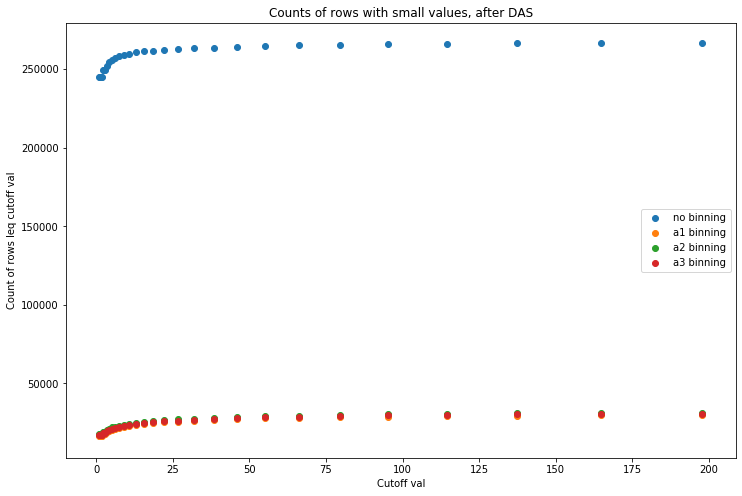

In [15]:
fig = plt.figure(figsize=(12,8))

cutoffs = 1.2**np.arange(30)
plot_small_vals(processed_df, var = 'nonneg_counts', label = 'no binning', cutoffs = cutoffs)
plot_small_vals(df_a1_processed, var = 'nonneg_counts', label = 'a1 binning', cutoffs = cutoffs)
plot_small_vals(df_a2_processed, var = 'nonneg_counts', label = 'a2 binning', cutoffs = cutoffs)
plot_small_vals(df_a3_processed, var = 'nonneg_counts', label = 'a3 binning',cutoffs = cutoffs)

plt.title('Counts of rows with small values, after DAS')
plt.show()

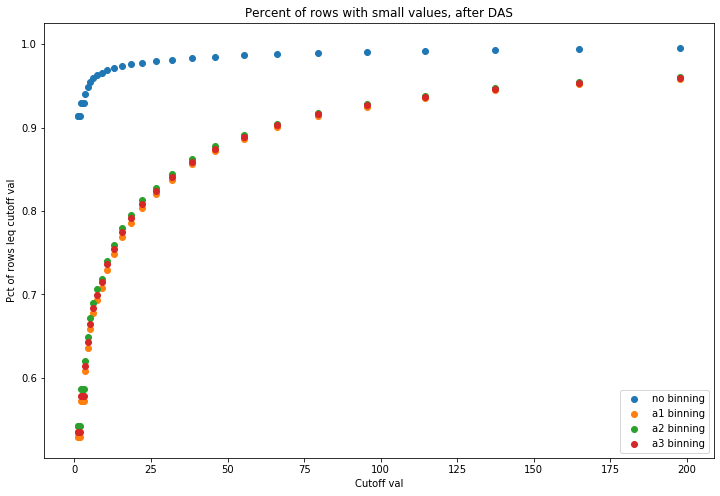

In [19]:
fig = plt.figure(figsize=(12,8))

cutoffs = 1.2**np.arange(30)
plot_small_vals_as_pct(processed_df, var = 'nonneg_counts', label = 'no binning', cutoffs = cutoffs)
plot_small_vals_as_pct(df_a1_processed, var = 'nonneg_counts', label = 'a1 binning', cutoffs = cutoffs)
plot_small_vals_as_pct(df_a2_processed, var = 'nonneg_counts', label = 'a2 binning', cutoffs = cutoffs)
plot_small_vals_as_pct(df_a3_processed, var = 'nonneg_counts', label = 'a3 binning',cutoffs = cutoffs)

plt.title('Percent of rows with small values, after DAS')
plt.show()

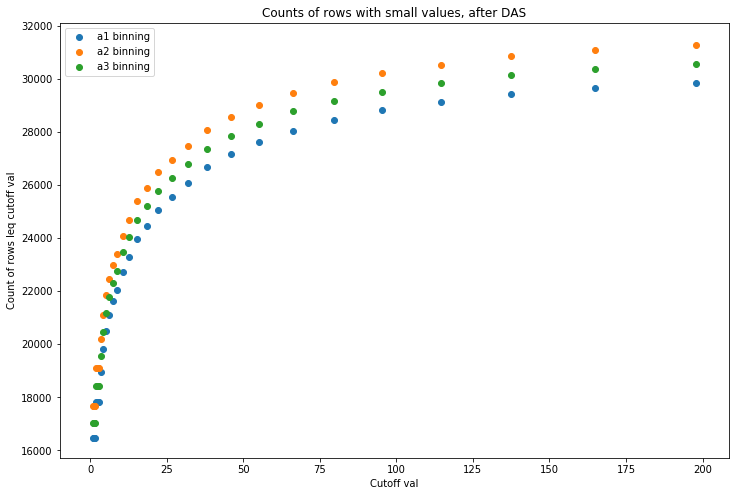

In [16]:
fig = plt.figure(figsize=(12,8))

cutoffs = 1.2**np.arange(30)
plot_small_vals(df_a1_processed, var = 'nonneg_counts', label = 'a1 binning', cutoffs = cutoffs)
plot_small_vals(df_a2_processed, var = 'nonneg_counts', label = 'a2 binning', cutoffs = cutoffs)
plot_small_vals(df_a3_processed, var = 'nonneg_counts', label = 'a3 binning',cutoffs = cutoffs)

plt.title('Counts of rows with small values, after DAS')
plt.show()

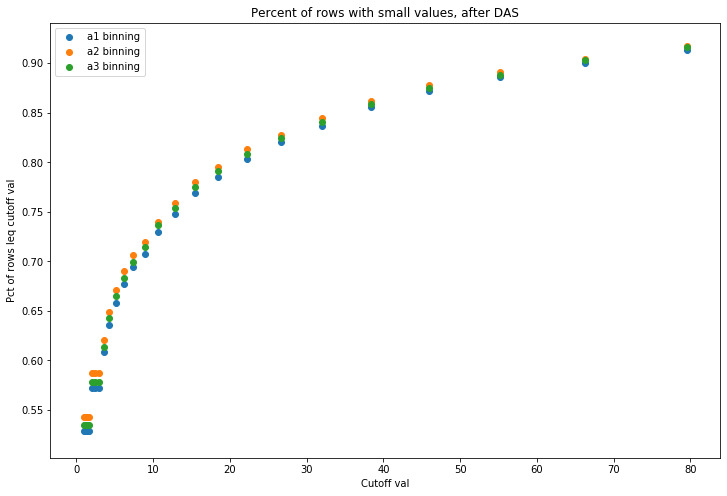

In [21]:
fig = plt.figure(figsize=(12,8))

cutoffs = 1.2**np.arange(25)
plot_small_vals_as_pct(df_a1_processed, var = 'nonneg_counts', label = 'a1 binning', cutoffs = cutoffs)
plot_small_vals_as_pct(df_a2_processed, var = 'nonneg_counts', label = 'a2 binning', cutoffs = cutoffs)
plot_small_vals_as_pct(df_a3_processed, var = 'nonneg_counts', label = 'a3 binning',cutoffs = cutoffs)

plt.title('Percent of rows with small values, after DAS')
plt.show()